In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
import re
from io import StringIO
from copy import deepcopy
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.image as pltimg

In [5]:
pip install pydotplus

Processing /home/jovyan/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50/pydotplus-2.0.2-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pydotplus

In [146]:
raw_health = pd.read_csv('features_health-1.csv', index_col=0)
raw_nonhealth = pd.read_csv('features_nonhealth_2.csv', index_col=0)

In [147]:
coln_health = list(raw_health)

for i in coln_health:
    raw_health = raw_health[~raw_health[i].isin(['..'])]
raw_health = raw_health.dropna()
raw_health = raw_health.iloc[:,1:]
raw_health = pd.DataFrame(raw_health, dtype=np.float)


In [148]:
coln_nonhealth = list(raw_nonhealth)

for i in coln_nonhealth:
    raw_nonhealth = raw_nonhealth[~raw_nonhealth[i].isin(['..'])]

raw_nonhealth = raw_nonhealth.dropna()
raw_nonhealth = raw_nonhealth.iloc[:,1:]
raw_nonhealth = pd.DataFrame(raw_nonhealth, dtype=np.float)


In [149]:
raw_health.shape

(265, 16)

In [158]:
raw_nonhealth.shape

(401, 15)

In [151]:
raw_health.head()

,%mental,"mental admission/100,000(18-19)",%poor SA-heath,%psycho,%high BP,%overweight,%smoker,%alcohol,%exercise,"self-harm rate/100,000","IMR/1,000",%HSV,%asthma,%COPD,%arthritis,%osteoporosis
Code (PHN/LGA),,,,,,,,,,,,,,,,
PHN101,17.5,516.8,12.4,10.4,22.8,35.3,12.3,14.3,62.0,8.5,3.0,4.4,8.2,2.0,12.5,4.6
11100,16.0,469.1,13.6,10.8,23.2,35.3,14.6,11.3,68.4,9.6,3.6,4.8,7.6,2.0,12.3,3.3
11300,15.5,503.9,12.3,11.1,23.9,34.5,12.3,10.1,66.7,7.9,3.3,4.6,6.9,1.8,12.2,5.2
11520,16.9,510.6,10.7,8.6,23.0,35.2,9.9,13.8,60.0,6.8,2.2,4.6,7.2,1.6,12.4,4.8
11570a,15.2,670.0,18.8,15.4,23.3,34.6,15.0,9.1,73.6,7.1,2.5,5.0,8.6,2.0,15.0,4.8


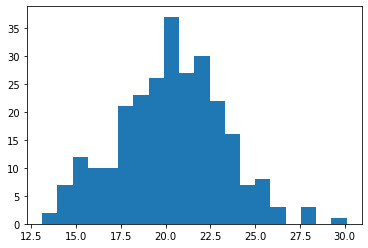

In [152]:
_ = plt.hist(raw_health.iloc[:,0], bins=20)

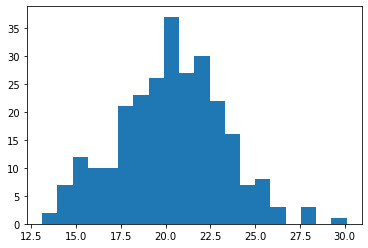

In [153]:
raw_nonhealth.head()

In [154]:
raw_nonhealth.iloc[:,0] = raw_nonhealth.iloc[:,0] / 100

In [155]:
raw_nonhealth.head()

,"Adimissions for mental health related conditions, Persons - All hospitals 2016/17 Asr Per 100,000",% labour force participation,% private dwellings where Internet accessed,% persons living in crowded dwellings,Total fertility rate,% Permanent migrants under the Family stream visa\n(total),Aboriginal population as proportion of total population (%),% households in dwellings receiving rent assistance,% persons living in social housing,% mortgage stress,% rental stress,% Low income households,% people receiving an unemployment benefit,% disability support pensioners,% unemployed
Code (PHN/LGA),,,,,,,,,,,,,,,
11100,17.735,67.6,81.9,17.3,1.52,5.2,2.1,13.2,5.7,9.8,25.2,36.2,4.6,2.9,3.1
11300,21.541,62.9,84.1,21.7,1.12,6.4,0.5,13.9,2.4,13.8,33.2,39.5,3.8,2.2,3.8
11520,26.733,68.9,87.5,10.7,1.48,4.2,0.6,7.4,1.8,8.7,20.1,27.0,2.6,1.7,2.0
12930,15.623,63.9,85.4,14.8,1.47,6.9,0.6,13.2,2.1,12.8,29.4,36.8,4.2,2.4,3.1
14170,28.404,76.0,86.8,10.8,1.32,4.0,1.4,13.6,2.7,4.7,16.8,23.7,4.4,2.7,3.7


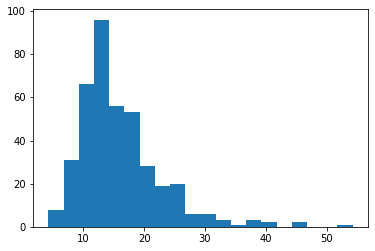

In [156]:
raw_nonhealth.head()
_ = plt.hist(raw_nonhealth.iloc[:,0], bins=20)

,Estimated number of people with mental and behavioural problems ASR per 100,"Mental consitions admissions ASR per 100,000(1 year later for 2018-2019)",% labour force participation,% private dwellings where Internet accessed,% persons living in crowded dwellings,Total fertility rate,% Permanent migrants under the Family stream visa\n(total),Aboriginal population as proportion of total population (%),% households in dwellings receiving rent assistance,% persons living in social housing,% mortgage stress,% rental stress,% Low income households,% people receiving an unemployment benefit,% disability support pensioners,% unemployed
Code (PHN/LGA),,,,,,,,,,,,,,,,
PHN101,17.5,516.8,69.6,85.8,13.4,1.51,4.6,1.1,11.8,3.2,8.5,22.4,31.9,3.9,2.5,3.2
11100,16.0,469.1,67.6,81.9,17.3,1.52,5.2,2.1,13.2,5.7,9.8,25.2,36.2,4.6,2.9,3.1
11300,15.5,503.9,62.9,84.1,21.7,1.12,6.4,0.5,13.9,2.4,13.8,33.2,39.5,3.8,2.2,3.8
11520,16.9,510.6,68.9,87.5,10.7,1.48,4.2,0.6,7.4,1.8,8.7,20.1,27.0,2.6,1.7,2.0
11570a,15.2,670.0,59.2,79.7,19.4,2.04,7.4,0.9,22.5,6.0,17.2,39.0,48.4,7.8,4.4,7.0


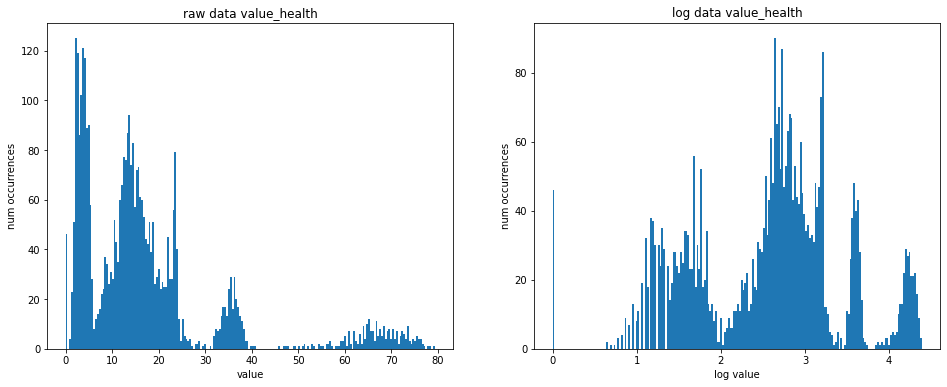

,%poor SA-heath,%psycho,%high BP,%overweight,%smoker,%alcohol,%exercise,"self-harm rate/100,000","IMR/1,000",%HSV,%asthma,%COPD,%arthritis,%osteoporosis
Code (PHN/LGA),,,,,,,,,,,,,,
PHN101,12.4,10.4,22.8,35.3,12.3,14.3,62.0,8.5,3.0,4.4,8.2,2.0,12.5,4.6
11100,13.6,10.8,23.2,35.3,14.6,11.3,68.4,9.6,3.6,4.8,7.6,2.0,12.3,3.3
11300,12.3,11.1,23.9,34.5,12.3,10.1,66.7,7.9,3.3,4.6,6.9,1.8,12.2,5.2
11520,10.7,8.6,23.0,35.2,9.9,13.8,60.0,6.8,2.2,4.6,7.2,1.6,12.4,4.8
11570a,18.8,15.4,23.3,34.6,15.0,9.1,73.6,7.1,2.5,5.0,8.6,2.0,15.0,4.8


In [38]:
# for health-relevant data
health_feature = raw_health.iloc[:,2:]
log_data_health = np.log(health_feature + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.hist(health_feature.values.flatten(), bins=200)
ax1.set_title('raw data value_health')
ax1.set_xlabel('value')
ax1.set_ylabel('num occurrences')
ax2.hist(log_data_health.values.flatten(), bins=200)
ax2.set_title('log data value_health')
ax2.set_xlabel('log value')
ax2.set_ylabel('num occurrences')
plt.show()

health_feature.head()

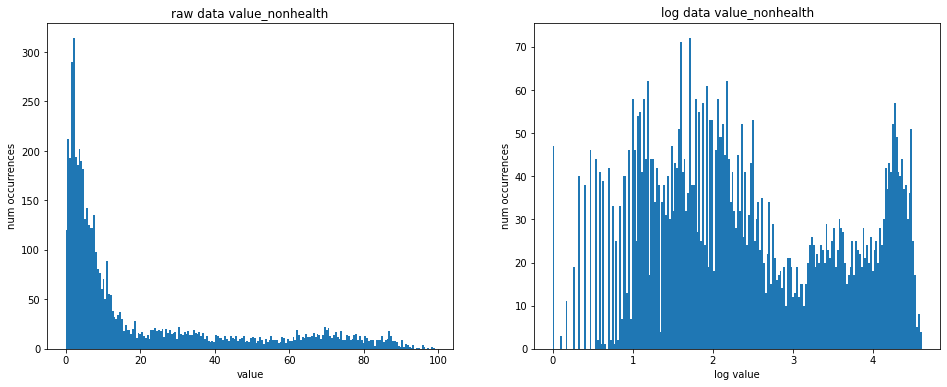

,% labour force participation,% private dwellings where Internet accessed,% persons living in crowded dwellings,Total fertility rate,% Permanent migrants under the Family stream visa\n(total),Aboriginal population as proportion of total population (%),% households in dwellings receiving rent assistance,% persons living in social housing,% mortgage stress,% rental stress,% Low income households,% people receiving an unemployment benefit,% disability support pensioners,% unemployed
Code (PHN/LGA),,,,,,,,,,,,,,
11100,67.6,81.9,17.3,1.52,5.2,2.1,13.2,5.7,9.8,25.2,36.2,4.6,2.9,3.1
11300,62.9,84.1,21.7,1.12,6.4,0.5,13.9,2.4,13.8,33.2,39.5,3.8,2.2,3.8
11520,68.9,87.5,10.7,1.48,4.2,0.6,7.4,1.8,8.7,20.1,27.0,2.6,1.7,2.0
12930,63.9,85.4,14.8,1.47,6.9,0.6,13.2,2.1,12.8,29.4,36.8,4.2,2.4,3.1
14170,76.0,86.8,10.8,1.32,4.0,1.4,13.6,2.7,4.7,16.8,23.7,4.4,2.7,3.7


In [157]:
# for nonhealth-relevant data
nonhealth_feature = raw_nonhealth.iloc[:,1:]
log_data_nonhealth = np.log(nonhealth_feature + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.hist(nonhealth_feature.values.flatten(), bins=200)
ax1.set_title('raw data value_nonhealth')
ax1.set_xlabel('value')
ax1.set_ylabel('num occurrences')
ax2.hist(log_data_nonhealth.values.flatten(), bins=200)
ax2.set_title('log data value_nonhealth')
ax2.set_xlabel('log value')
ax2.set_ylabel('num occurrences')
plt.show()

nonhealth_feature.head()

In [40]:
# for health
pca = PCA()
health_pca = pca.fit_transform(health_feature.to_numpy())
var = 0
n = 0
# increase the value of n by 1, stop until n explaining 90% of the variance
while var < 0.9:
    var += pca.explained_variance_ratio_[n]
    n += 1
# update PCA with the correct number of components, namely, 'n' explaining 90% of the variance
pca = PCA(n_components = n)
health_pca = pca.fit_transform(health_feature.to_numpy())

print(n)

5


In [41]:
df_h = pd.DataFrame(health_pca)
#  find the name(index) of the feature with the highest feature score on pc1
most_important = np.abs(pca.components_[0]).argmax()
cols = health_feature.columns 
LGAcodes = cols[most_important]
print(f'Gene that contributes most to the first eigenvector: {LGAcodes}')

Gene that contributes most to the first eigenvector: %exercise


In [43]:
# for health log
pca = PCA()
healthlog_pca = pca.fit_transform(log_data_health.to_numpy())
var = 0
n = 0
# increase the value of n by 1, stop until n explaining 90% of the variance
while var < 0.9:
    var += pca.explained_variance_ratio_[n]
    n += 1
# update PCA with the correct number of components, namely, 'n' explaining 90% of the variance
pca = PCA(n_components = n)
health_pca = pca.fit_transform(log_data_health.to_numpy())

print(n)

4


In [17]:
# MI feature selection for health
X_train,X_test,y_train,y_test=train_test_split(raw_health.drop(labels=['mental admission/100,000(18-19)', '%mental'], axis=1),
    raw_health['%mental'],
    test_size=0.3,
    random_state=0)

In [18]:
mutual_info = mutual_info_regression(X_train, y_train, random_state = 1)
print(mutual_info)

[0.24636082 0.11789434 0.097659   0.05153083 0.18093075 0.14743315
 0.06945384 0.33143144 0.03266135 0.13812464 0.29443954 0.2824536
 0.06627613 0.07046749]


In [19]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
sort_value_health = mutual_info.sort_values(ascending=False)
print(sort_value_health)

self-harm rate/100,000    0.331431
%asthma                   0.294440
%COPD                     0.282454
%poor SA-heath            0.246361
%smoker                   0.180931
%alcohol                  0.147433
%HSV                      0.138125
%psycho                   0.117894
%high BP                  0.097659
%osteoporosis             0.070467
%exercise                 0.069454
%arthritis                0.066276
%overweight               0.051531
IMR/1,000                 0.032661
dtype: float64


<AxesSubplot:>

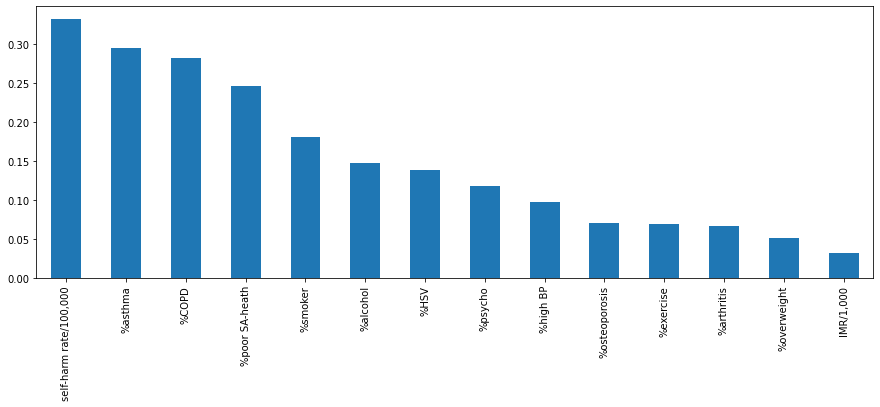

In [20]:
sort_value_health.plot.bar(figsize=(15,5))


In [21]:
# mutual correlation between features
dic = {}
raw_feature_health_ = raw_health.iloc[:,2:]

raw_feature_health_.head()
for i in range(0, 14):
    X_train,X_test,y_train,y_test=train_test_split(raw_feature_health_.drop(labels = raw_feature_health_.columns[i], axis=1), 
    raw_feature_health_[raw_feature_health_.columns[i]],
    test_size=0.3,
    random_state=3)
    
    mutual_info = mutual_info_regression(X_train, y_train, random_state = 3)
    dic[raw_feature_health_.columns[i]] = mutual_info

print(dic)

{'%poor SA-heath': array([0.36551561, 0.16125473, 0.23261297, 0.69150927, 0.16161487,
       0.52844826, 0.20622196, 0.22273488, 0.2147412 , 0.40225798,
       0.58581975, 0.33204459, 0.06166805]), '%psycho': array([0.36344363, 0.14362201, 0.09221822, 0.35783341, 0.04362494,
       0.35119291, 0.0749487 , 0.2236643 , 0.17476631, 0.24778734,
       0.27160531, 0.17326969, 0.03674374]), '%high BP': array([0.15975939, 0.12411828, 0.16098692, 0.2226141 , 0.09835044,
       0.24001712, 0.06387683, 0.10917406, 0.29185311, 0.1785791 ,
       0.22017564, 0.21868981, 0.09425514]), '%overweight': array([0.23843856, 0.09473954, 0.14343302, 0.24891144, 0.18985447,
       0.16367011, 0.01713848, 0.12156171, 0.0867139 , 0.08258822,
       0.30692179, 0.1401683 , 0.04210224]), '%smoker': array([0.70298579, 0.37287434, 0.23647914, 0.24808937, 0.14301941,
       0.40088626, 0.29427848, 0.34000691, 0.24210389, 0.36919187,
       0.46058921, 0.26029193, 0.12821839]), '%alcohol': array([0.16042748, 0.0417

In [22]:
lst = raw_feature_health_.columns
print(lst)

df = pd.DataFrame(data = 0, columns = lst, index = lst)


for i in range(0,13):
    for j in range(i+1, 14):
        df.iloc[i,j] = (dic[lst[i]][j-1] + dic[lst[j]][i])/2
df = df.T
print(df)



Index(['%poor SA-heath', '%psycho', '%high BP', '%overweight', '%smoker',
       '%alcohol', '%exercise', 'self-harm rate/100,000', 'IMR/1,000', '%HSV',
       '%asthma', '%COPD', '%arthritis', '%osteoporosis'],
      dtype='object')
                        %poor SA-heath   %psycho  %high BP  %overweight  \
%poor SA-heath                0.000000  0.000000  0.000000     0.000000   
%psycho                       0.364480  0.000000  0.000000     0.000000   
%high BP                      0.160507  0.133870  0.000000     0.000000   
%overweight                   0.235526  0.093479  0.152210     0.000000   
%smoker                       0.697248  0.365354  0.229547     0.248500   
%alcohol                      0.161021  0.042698  0.099130     0.184513   
%exercise                     0.525720  0.349066  0.236054     0.162993   
self-harm rate/100,000        0.210073  0.075430  0.062433     0.012394   
IMR/1,000                     0.225556  0.216176  0.099473     0.122232   
%HSV            

Text(0.5, 1.0, 'Heatmap of MI between health-relevant features')

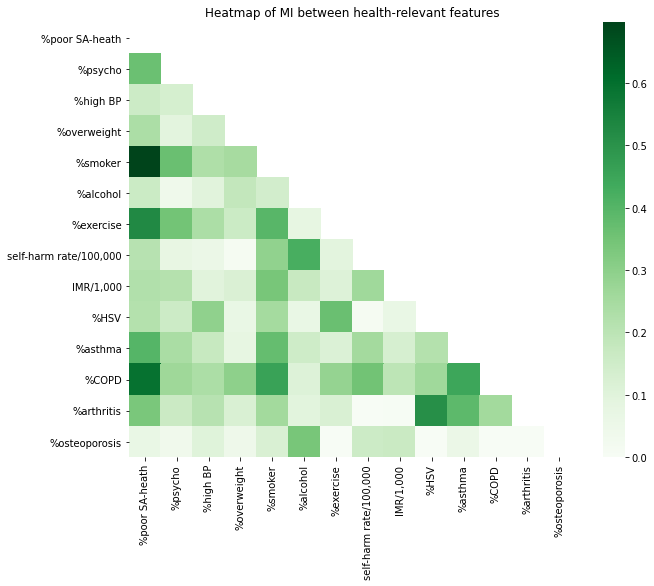

In [23]:
mask = np.zeros_like(df, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(num =3, figsize = (10,8))
sns.heatmap(df,cmap='Greens',mask=mask, xticklabels = True)
plt.title('Heatmap of MI between health-relevant features')

In [52]:
 # smoker and poor SA-health, COPD and SA-health...
    

In [24]:
# MI feature selection for health_log
log_health = np.log(raw_health + 1)
print(log_health.head())

X_train_log,X_test_log,y_train_log,y_test_log = train_test_split(log_health.drop(labels=['mental admission/100,000(18-19)', '%mental'], axis=1),
    log_health['%mental'],
    test_size=0.3,
    random_state=3)

                  %mental  mental admission/100,000(18-19)  %poor SA-heath  \
Code\n(PHN/LGA)                                                              
PHN101           2.917771                         6.249589        2.595255   
11100            2.833213                         6.152945        2.681022   
11300            2.803360                         6.224360        2.587764   
11520            2.884801                         6.237543        2.459589   
11570a           2.785011                         6.508769        2.985682   

                  %psycho  %high BP  %overweight   %smoker  %alcohol  \
Code\n(PHN/LGA)                                                        
PHN101           2.433613  3.169686     3.591818  2.587764  2.727853   
11100            2.468100  3.186353     3.591818  2.747271  2.509599   
11300            2.493205  3.214868     3.569533  2.587764  2.406945   
11520            2.261763  3.178054     3.589059  2.388763  2.694627   
11570a           2.79

In [25]:
mutual_info_log = mutual_info_regression(X_train_log, y_train_log, random_state = 3)
print(mutual_info_log)

[0.23449546 0.15033933 0.09505992 0.0887968  0.24193619 0.30538553
 0.06825224 0.46701298 0.1653956  0.17446047 0.4259445  0.32384423
 0.11304577 0.13585884]


In [26]:
mutual_info_log = pd.Series(mutual_info_log)
mutual_info_log.index = X_train_log.columns
sort_value_health_log = mutual_info_log.sort_values(ascending=False)
print(sort_value_health_log)

self-harm rate/100,000    0.467013
%asthma                   0.425944
%COPD                     0.323844
%alcohol                  0.305386
%smoker                   0.241936
%poor SA-heath            0.234495
%HSV                      0.174460
IMR/1,000                 0.165396
%psycho                   0.150339
%osteoporosis             0.135859
%arthritis                0.113046
%high BP                  0.095060
%overweight               0.088797
%exercise                 0.068252
dtype: float64


<AxesSubplot:>

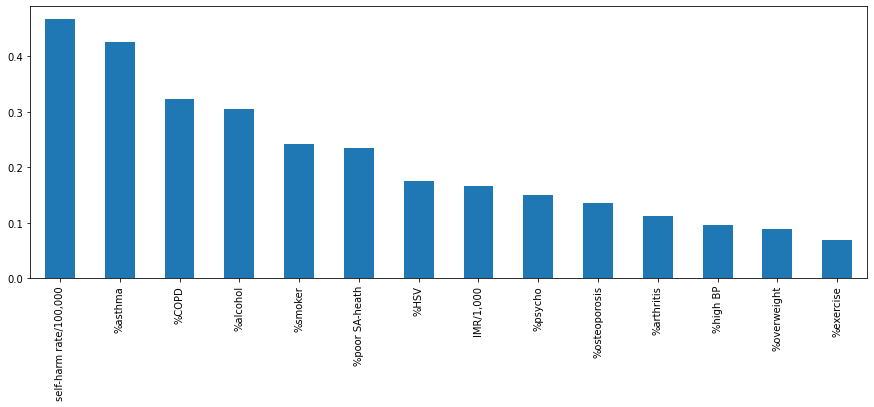

In [27]:
sort_value_health_log.plot.bar(figsize=(15,5))

In [188]:
# MI feature selection for non-health
X_train_n,X_test_n,y_train_n,y_test_n = train_test_split(raw_nonhealth.drop(labels=['Adimissions for mental health related conditions, Persons - All hospitals 2016/17 Asr Per 100,000'], axis=1),
    raw_nonhealth['Adimissions for mental health related conditions, Persons - All hospitals 2016/17 Asr Per 100,000'],
    test_size=0.3,
    random_state=3)

In [189]:
mutual_info_n = mutual_info_regression(X_train_n, y_train_n, random_state = 4)
print(mutual_info_n)

[0.         0.04441818 0.07257468 0.01793669 0.05075814 0.09429432
 0.3195865  0.11036994 0.13245818 0.04413671 0.03743507 0.03800875
 0.         0.00341007]


In [190]:
mutual_info_n = pd.Series(mutual_info_n)
mutual_info_n.index = X_train_n.columns
sort_value_health_n = mutual_info_n.sort_values(ascending=False)
print(sort_value_health_n)

% households in dwellings receiving rent assistance            0.319587
% mortgage stress                                              0.132458
% persons living in social housing                             0.110370
Aboriginal population as proportion of total population (%)    0.094294
% persons living in crowded dwellings                          0.072575
% Permanent migrants under the Family stream visa\n(total)     0.050758
% private dwellings where Internet accessed                    0.044418
% rental stress                                                0.044137
% people receiving an unemployment benefit                     0.038009
% Low income households                                        0.037435
Total fertility rate                                           0.017937
% unemployed                                                   0.003410
% disability support pensioners                                0.000000
% labour force participation                                   0

<AxesSubplot:>

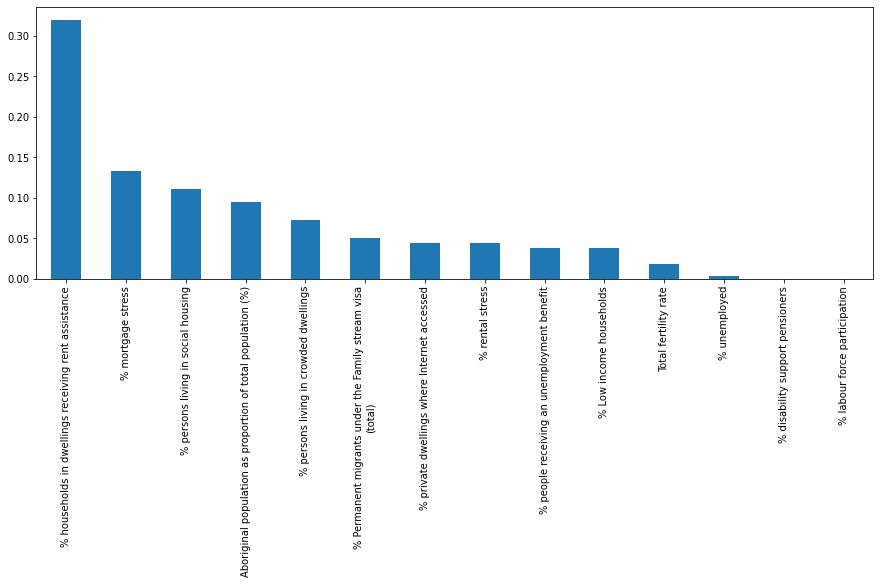

In [191]:
sort_value_health_n.plot.bar(figsize=(15,5))

In [170]:
# mutual correlation between features nonhealth
dic_n = {}
raw_feature_health_n = raw_nonhealth.iloc[:,1:]

for i in range(0, 14):
    X_train_n,X_test_n,y_train_n,y_test_n = train_test_split(raw_feature_health_n.drop(labels = raw_feature_health_n.columns[i], axis=1), 
    raw_feature_health_n[raw_feature_health_n.columns[i]],
    test_size=0.3,
    random_state=5)
    
    mutual_info_n = mutual_info_regression(X_train_n, y_train_n, random_state = 2)
    dic_n[raw_feature_health_n.columns[i]] = mutual_info_n

print(dic_n)

{'% labour force participation': array([0.14757346, 0.00346394, 0.14092338, 0.12735383, 0.05055601,
       0.13740815, 0.076247  , 0.14802916, 0.2610707 , 0.40802946,
       0.23015809, 0.36556027, 0.03717623]), '% private dwellings where Internet accessed': array([0.14470603, 0.13292927, 0.23066614, 0.4838193 , 0.41030125,
       0.30733005, 0.21834521, 0.13389627, 0.1879873 , 0.38445218,
       0.53187339, 0.55009906, 0.1551054 ]), '% persons living in crowded dwellings': array([0.00541322, 0.13431916, 0.04846045, 0.2257336 , 0.3428822 ,
       0.00794555, 0.2357668 , 0.0561837 , 0.11586976, 0.10076538,
       0.23038327, 0.08235197, 0.11330633]), 'Total fertility rate': array([0.14827922, 0.22763833, 0.05219236, 0.28885117, 0.30006892,
       0.12875434, 0.        , 0.09000966, 0.07442518, 0.23425019,
       0.27427209, 0.14386299, 0.1044716 ]), '% Permanent migrants under the Family stream visa\n(total)': array([0.13681208, 0.48017972, 0.22804204, 0.28984812, 0.27998815,
       0.1

In [173]:
lst_n = raw_feature_health_n.columns
print(lst_n)

df_n = pd.DataFrame(data = 0, columns = lst_n, index = lst_n)


for i in range(0,13):
    for j in range(i+1, 14):
        df_n.iloc[i,j] = (dic_n[lst_n[i]][j-1] + dic_n[lst_n[j]][i])/2
df_n = df_n.T
print(df_n)

Index(['% labour force participation',
       '% private dwellings where Internet accessed',
       '% persons living in crowded dwellings', 'Total fertility rate',
       '% Permanent migrants under the Family stream visa\n(total)',
       'Aboriginal population as proportion of total population (%)',
       '% households in dwellings receiving rent assistance',
       '% persons living in social housing', '% mortgage stress',
       '% rental stress', '% Low income households',
       '% people receiving an unemployment benefit',
       '% disability support pensioners', '% unemployed'],
      dtype='object')
                                                    % labour force participation  \
% labour force participation                                            0.000000   
% private dwellings where Internet accessed                             0.146140   
% persons living in crowded dwellings                                   0.004439   
Total fertility rate                         

Text(0.5, 1.0, 'Heatmap of MI between nonhealth-relevant features')

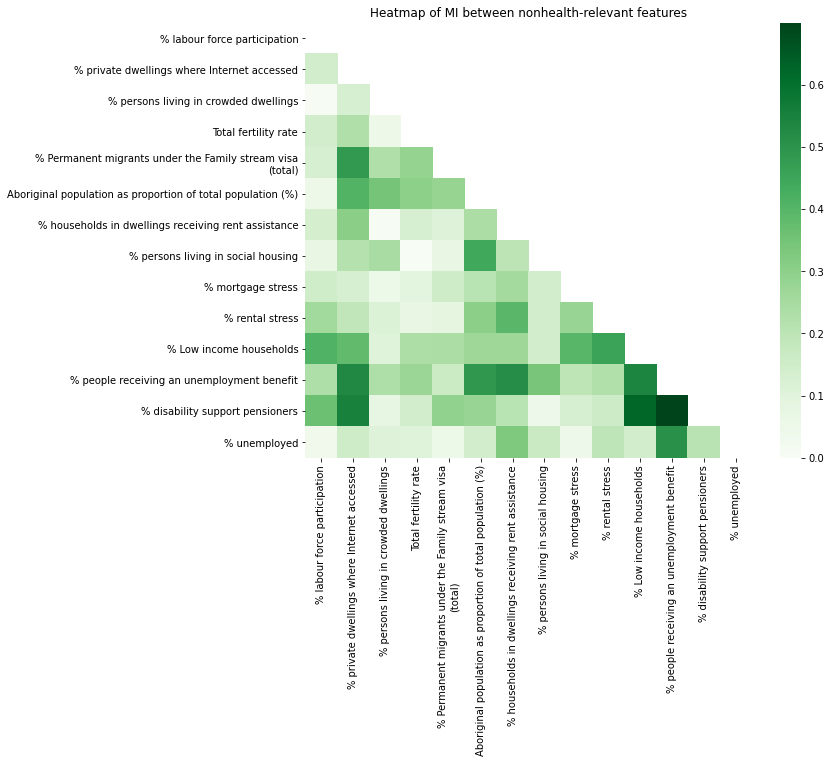

In [174]:

plt.figure(num =4, figsize = (10,8))
sns.heatmap(df_n,cmap='Greens',mask=mask, xticklabels = True)
plt.title('Heatmap of MI between nonhealth-relevant features')

In [138]:
# '% people receiving an unemployment benefit' and '% disability support pensioners' ; private dwellings where Internet accessed' and 'disability support pensioners'; 

In [81]:
# decision tree for health
X_train,X_test,y_train,y_test=train_test_split(raw_health.drop(labels=['mental admission/100,000(18-19)', '%mental'], axis=1),
    raw_health['%mental'],
    test_size=0.3,
    random_state=0)


n1 = len(y_train)
n2 = len(y_test)
print(n1, n2)
y_train_labeled = y_train.copy()
for i in range(0,n1):
    value = y_train_labeled[i]
    if value <= 17.5:
        y_train_labeled[i] = 0
    elif value > 17.5 and value < 27:
        y_train_labeled[i] = 1
    elif value >= 27:
        y_train_labeled[i] = 2

print(y_train.head())
print(y_train_labeled.head())
print(y_train_labeled.value_counts()[2])


185 80
Code\n(PHN/LGA)
16260a    14.1
55320     17.1
24410     21.4
14100     19.2
26490     20.5
Name: %mental, dtype: float64
Code\n(PHN/LGA)
16260a    0.0
55320     0.0
24410     1.0
14100     1.0
26490     1.0
Name: %mental, dtype: float64
2


In [82]:
y_test_labeled = y_test.copy()
for i in range(0,n2):
    value = y_test_labeled[i]
    if value <= 17.5:
        y_test_labeled[i] = 0
    elif value > 17.5 and value < 27:
        y_test_labeled[i] = 1
    elif value >= 27:
        y_test_labeled[i] = 2

print(y_test.head())
print(y_test_labeled.head())
print(y_test_labeled.value_counts()[2])

Code\n(PHN/LGA)
27070    18.4
24650    19.1
13910    22.9
16650    14.3
36630    27.9
Name: %mental, dtype: float64
Code\n(PHN/LGA)
27070    1.0
24650    1.0
13910    1.0
16650    0.0
36630    2.0
Name: %mental, dtype: float64
2


In [86]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="entropy",random_state=6, max_depth=3)
dt = dt.fit(X_train, y_train_labeled)



In [87]:
y_pred=dt.predict(X_test)
print(accuracy_score(y_test_labeled, y_pred))

0.925


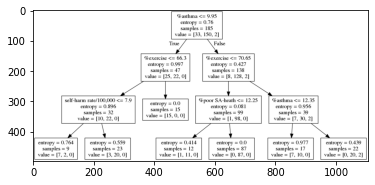

In [88]:
features_health = lst
data = tree.export_graphviz(dt, out_file=None, feature_names=features_health)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

In [207]:
# decision tree for non-health
X_train_n,X_test_n,y_train_n,y_test_n = train_test_split(raw_nonhealth.drop(labels=['Adimissions for mental health related conditions, Persons - All hospitals 2016/17 Asr Per 100,000'], axis=1),
    raw_nonhealth['Adimissions for mental health related conditions, Persons - All hospitals 2016/17 Asr Per 100,000'],
    test_size=0.3,
    random_state=3)

In [208]:
n3 = len(y_train_n)
n4 = len(y_test_n)
print(n3, n4)
y_train_n_labeled = y_train_n.copy()
for i in range(0,n3):
    value = y_train_n_labeled[i]
    if value <= 10:
        y_train_n_labeled[i] = 0
    elif value > 10 and value < 30:
        y_train_n_labeled[i] = 1
    elif value >= 30:
        y_train_n_labeled[i] = 2

print(y_train_n.head())
print(y_train_n_labeled.head())
print(y_train_n_labeled.value_counts()[2])

280 121
Code\n(PHN/LGA)
11650    23.561
59340    20.543
25990     8.159
50080    16.886
14200    12.416
Name: Adimissions for mental health related conditions, Persons - All hospitals 2016/17 Asr Per 100,000, dtype: float64
Code\n(PHN/LGA)
11650    1.0
59340    1.0
25990    0.0
50080    1.0
14200    1.0
Name: Adimissions for mental health related conditions, Persons - All hospitals 2016/17 Asr Per 100,000, dtype: float64
12


In [209]:
y_test_n_labeled = y_test_n.copy()
for i in range(0,n4):
    value = y_test_n_labeled[i]
    if value <= 10:
        y_test_n_labeled[i] = 0
    elif value > 10 and value < 30:
        y_test_n_labeled[i] = 1
    elif value >= 30:
        y_test_n_labeled[i] = 2

print(y_test_n.head())
print(y_test_n_labeled.head())
print(y_test_n_labeled.value_counts()[2])

Code\n(PHN/LGA)
61410    44.651
15350    25.383
51750    13.361
17620    13.989
14750    17.566
Name: Adimissions for mental health related conditions, Persons - All hospitals 2016/17 Asr Per 100,000, dtype: float64
Code\n(PHN/LGA)
61410    2.0
15350    1.0
51750    1.0
17620    1.0
14750    1.0
Name: Adimissions for mental health related conditions, Persons - All hospitals 2016/17 Asr Per 100,000, dtype: float64
5


In [221]:
from sklearn.tree import DecisionTreeClassifier

dt_n = DecisionTreeClassifier(criterion="entropy",random_state=6, max_depth=2)
dt_n = dt_n.fit(X_train_n, y_train_n_labeled)



In [222]:
y_pred_n=dt_n.predict(X_test_n)
print(accuracy_score(y_test_n_labeled, y_pred_n))

0.8099173553719008


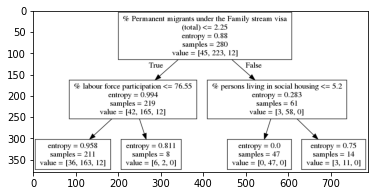

Index(['% labour force participation',
       '% private dwellings where Internet accessed',
       '% persons living in crowded dwellings', 'Total fertility rate',
       '% Permanent migrants under the Family stream visa\n(total)',
       'Aboriginal population as proportion of total population (%)',
       '% households in dwellings receiving rent assistance',
       '% persons living in social housing', '% mortgage stress',
       '% rental stress', '% Low income households',
       '% people receiving an unemployment benefit',
       '% disability support pensioners', '% unemployed'],
      dtype='object')


In [223]:
features_nonhealth = lst_n
data_n = tree.export_graphviz(dt_n, out_file=None, feature_names=features_nonhealth)
graph_n = pydotplus.graph_from_dot_data(data_n)
graph_n.write_png('mydecisiontree_n.png')

img_n=pltimg.imread('mydecisiontree_n.png')
img_nplot = plt.imshow(img_n)
plt.show()
print(lst_n)

In [230]:
# decision tree for health 3 selected features
X_train,X_test,y_train,y_test=train_test_split(raw_health.drop(labels=['mental admission/100,000(18-19)', '%mental'], axis=1),
    raw_health['%mental'],
    test_size=0.3,
    random_state=0)

X_train = X_train.iloc[:,[4,10,11]]
X_test = X_test.iloc[:,[4,10,11]]

lst_selected = X_train.columns

n1 = len(y_train)
n2 = len(y_test)
print(n1, n2)
y_train_labeled = y_train.copy()
for i in range(0,n1):
    value = y_train_labeled[i]
    if value <= 17.5:
        y_train_labeled[i] = 0
    elif value > 17.5 and value < 27:
        y_train_labeled[i] = 1
    elif value >= 27:
        y_train_labeled[i] = 2

print(y_train.head())
print(y_train_labeled.head())
print(y_train_labeled.value_counts()[2])
print(X_train.head())
print(lst_selected)

185 80
Code\n(PHN/LGA)
16260a    14.1
55320     17.1
24410     21.4
14100     19.2
26490     20.5
Name: %mental, dtype: float64
Code\n(PHN/LGA)
16260a    0.0
55320     0.0
24410     1.0
14100     1.0
26490     1.0
Name: %mental, dtype: float64
2
                 %smoker  %asthma  %COPD
Code\n(PHN/LGA)                         
16260a              10.6      7.5    1.7
55320                8.2      8.8    1.5
24410               13.8     12.3    2.3
14100                8.5      8.4    1.2
26490               11.7     12.7    2.1
Index(['%smoker', '%asthma', '%COPD'], dtype='object')


In [231]:
y_test_labeled = y_test.copy()
for i in range(0,n2):
    value = y_test_labeled[i]
    if value <= 17.5:
        y_test_labeled[i] = 0
    elif value > 17.5 and value < 27:
        y_test_labeled[i] = 1
    elif value >= 27:
        y_test_labeled[i] = 2

print(y_test.head())
print(y_test_labeled.head())
print(y_test_labeled.value_counts()[2])



Code\n(PHN/LGA)
27070    18.4
24650    19.1
13910    22.9
16650    14.3
36630    27.9
Name: %mental, dtype: float64
Code\n(PHN/LGA)
27070    1.0
24650    1.0
13910    1.0
16650    0.0
36630    2.0
Name: %mental, dtype: float64
2


0.9


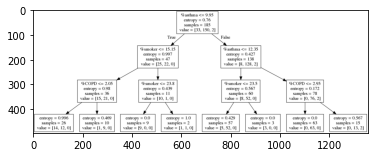

In [232]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="entropy",random_state=4, max_depth=3)
dt = dt.fit(X_train, y_train_labeled)

y_pred=dt.predict(X_test)
print(accuracy_score(y_test_labeled, y_pred))

data = tree.export_graphviz(dt, out_file=None, feature_names= lst_selected)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

In [258]:
# decision tree for non-health with 3 selected features
X_train_n,X_test_n,y_train_n,y_test_n = train_test_split(raw_nonhealth.drop(labels=['Adimissions for mental health related conditions, Persons - All hospitals 2016/17 Asr Per 100,000'], axis=1),
    raw_nonhealth['Adimissions for mental health related conditions, Persons - All hospitals 2016/17 Asr Per 100,000'],
    test_size=0.3,
    random_state=8)


X_train_n = X_train_n.iloc[:,[6,7,8]]
X_test_n = X_test_n.iloc[:,[6,7,8]]
lst_selected_n = X_train_n.columns

In [259]:
n3 = len(y_train_n)
n4 = len(y_test_n)
print(n3, n4)
y_train_n_labeled = y_train_n.copy()
for i in range(0,n3):
    value = y_train_n_labeled[i]
    if value <= 10:
        y_train_n_labeled[i] = 0
    elif value > 10 and value < 30:
        y_train_n_labeled[i] = 1
    elif value >= 30:
        y_train_n_labeled[i] = 2

print(y_train_n.head())
print(y_train_n_labeled.head())
print(y_train_n_labeled.value_counts()[2])


y_test_n_labeled = y_test_n.copy()
for i in range(0,n4):
    value = y_test_n_labeled[i]
    if value <= 10:
        y_test_n_labeled[i] = 0
    elif value > 10 and value < 30:
        y_test_n_labeled[i] = 1
    elif value >= 30:
        y_test_n_labeled[i] = 2

print(y_test_n.head())
print(y_test_n_labeled.head())
print(y_test_n_labeled.value_counts()[2])
print(X_train_n.head())
print(lst_selected_n)

280 121
Code\n(PHN/LGA)
56090     7.949
14850    16.322
47700    10.393
33960    22.601
57910    15.343
Name: Adimissions for mental health related conditions, Persons - All hospitals 2016/17 Asr Per 100,000, dtype: float64
Code\n(PHN/LGA)
56090    0.0
14850    1.0
47700    1.0
33960    1.0
57910    1.0
Name: Adimissions for mental health related conditions, Persons - All hospitals 2016/17 Asr Per 100,000, dtype: float64
11
Code\n(PHN/LGA)
16200    15.313
35760    12.498
10650    12.070
51680     9.035
34580    12.807
Name: Adimissions for mental health related conditions, Persons - All hospitals 2016/17 Asr Per 100,000, dtype: float64
Code\n(PHN/LGA)
16200    1.0
35760    1.0
10650    1.0
51680    0.0
34580    1.0
Name: Adimissions for mental health related conditions, Persons - All hospitals 2016/17 Asr Per 100,000, dtype: float64
6
                 % households in dwellings receiving rent assistance  \
Code\n(PHN/LGA)                                                        
56090    

In [270]:
from sklearn.tree import DecisionTreeClassifier

dt_n = DecisionTreeClassifier(criterion="entropy",random_state=6, max_depth=2)
dt_n = dt_n.fit(X_train_n, y_train_n_labeled)

y_pred_n=dt_n.predict(X_test_n)
print(accuracy_score(y_test_n_labeled, y_pred_n))

0.768595041322314


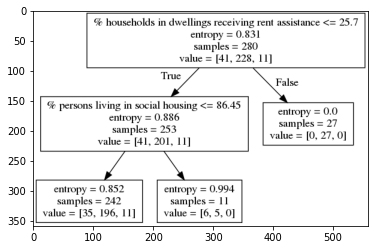

Index(['% labour force participation',
       '% private dwellings where Internet accessed',
       '% persons living in crowded dwellings', 'Total fertility rate',
       '% Permanent migrants under the Family stream visa\n(total)',
       'Aboriginal population as proportion of total population (%)',
       '% households in dwellings receiving rent assistance',
       '% persons living in social housing', '% mortgage stress',
       '% rental stress', '% Low income households',
       '% people receiving an unemployment benefit',
       '% disability support pensioners', '% unemployed'],
      dtype='object')


In [271]:
features_nonhealth = lst_n
data_n = tree.export_graphviz(dt_n, out_file=None, feature_names=lst_selected_n)
graph_n = pydotplus.graph_from_dot_data(data_n)
graph_n.write_png('mydecisiontree_n.png')

img_n=pltimg.imread('mydecisiontree_n.png')
img_nplot = plt.imshow(img_n)
plt.show()
print(lst_n)

0.6115702479338843


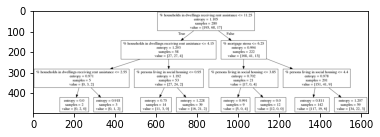

Index(['% labour force participation',
       '% private dwellings where Internet accessed',
       '% persons living in crowded dwellings', 'Total fertility rate',
       '% Permanent migrants under the Family stream visa\n(total)',
       'Aboriginal population as proportion of total population (%)',
       '% households in dwellings receiving rent assistance',
       '% persons living in social housing', '% mortgage stress',
       '% rental stress', '% Low income households',
       '% people receiving an unemployment benefit',
       '% disability support pensioners', '% unemployed'],
      dtype='object')


0.9


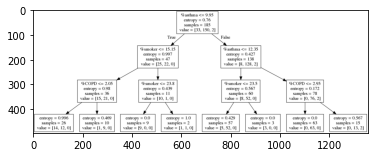